## 1. Download a dataset of your choice

Dry Bean Dataset. (2020). UCI Machine Learning Repository.

Data Set Link : https://docs.google.com/spreadsheets/d/1-DBeo3-trNtXXvVXH3OtWKX3Ps5vWshZ/edit?usp=sharing&ouid=105557392828125877998&rtpof=true&sd=true

The dataset comprises geometric features of bean seeds, including area, perimeter, major and minor axis lengths, aspect ratio, eccentricity, convex area, equivalent diameter, extent, solidity, roundness, compactness, and four unspecified shape factors. With 17 features and 3 class labels (e.g., Seker, Barbunya, Bombay), it's suitable for bean classification tasks.


In [ ]:
import pandas as pd
file_path = '/content/Dry_Bean_Dataset.xlsx'
df = pd.read_excel(file_path)
print(df)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
3866  237270   1921.685       738.144502       412.921647      1.787614   
3867  241322   1895.940       726.373493       427.370120      1.699636   
3868  248424   1884.557       715.053040       446.043618      1.603101   
3869  251432   1919.868       719.125690       450.926187      1.594775   
3870  254616   1985.370       738.860153       447.418329      1.651386   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0         0.549812 

In [ ]:
import pandas as pd

def merge_dataframes(df1, df2):
    merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
    return merged_df


In [ ]:
unique_values = df['Class'].unique()
print("Unique values in column '{}': {}".format('Class', unique_values))

Unique values in column 'Class': ['SEKER' 'BARBUNYA' 'BOMBAY']


In [ ]:
df['Class_mapped'], class_mapping = pd.factorize(df['Class'])
df = df.drop('Class', axis=1)
print(df)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
3866  237270   1921.685       738.144502       412.921647      1.787614   
3867  241322   1895.940       726.373493       427.370120      1.699636   
3868  248424   1884.557       715.053040       446.043618      1.603101   
3869  251432   1919.868       719.125690       450.926187      1.594775   
3870  254616   1985.370       738.860153       447.418329      1.651386   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0         0.549812 

In [ ]:
class_mapped = df['Class_mapped']

In [ ]:
import pandas as pd
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
if df.isnull().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

Missing values in each column:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class_mapped       0
dtype: int64
There are no missing values in the DataFrame.


## 2. Visualize it using multiple dimensions and say why SVD and PCA should be used here

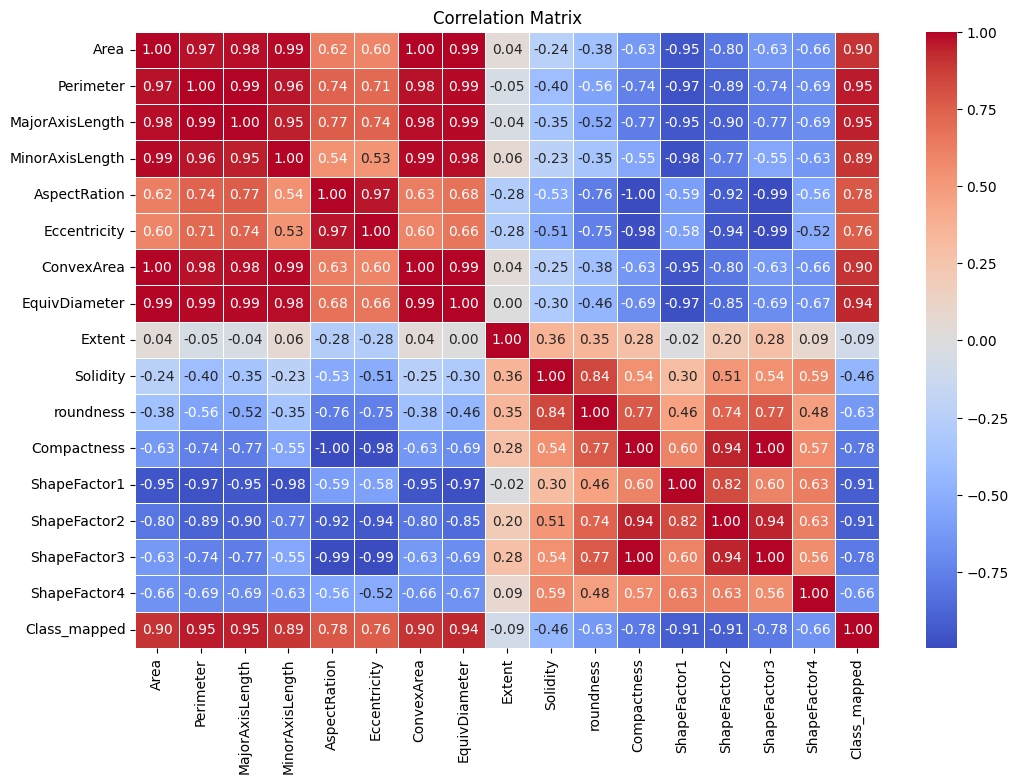

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_wo = df.drop(columns=['Class_mapped'])

In [ ]:
selected_features = ['Perimeter', 'AspectRation', 'Extent', 'Solidity', 'roundness','Class_mapped']
new_df = df[selected_features]
new_df.head()

,Perimeter,AspectRation,Extent,Solidity,roundness,Class_mapped
0,610.291,1.197191,0.763923,0.988856,0.958027,0
1,638.018,1.097356,0.783968,0.984986,0.887034,0
2,624.110,1.209713,0.778113,0.989559,0.947849,0
3,645.884,1.153638,0.782681,0.976696,0.903936,0
4,620.134,1.060798,0.773098,0.990893,0.984877,0


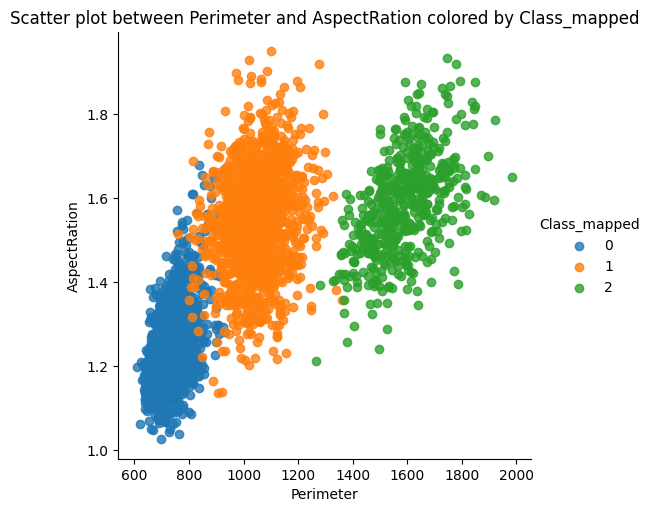

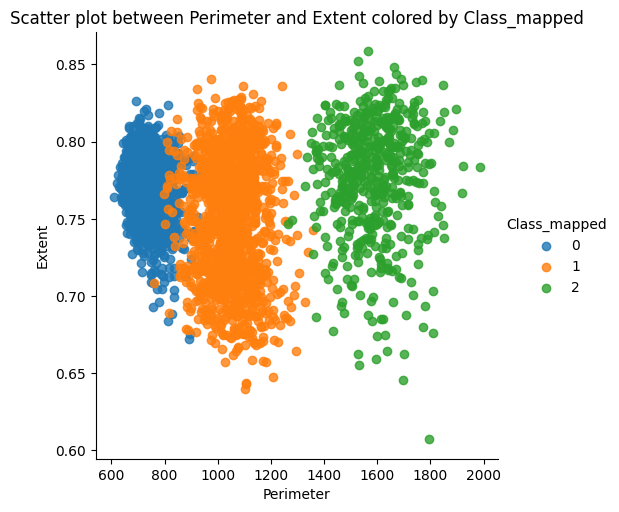

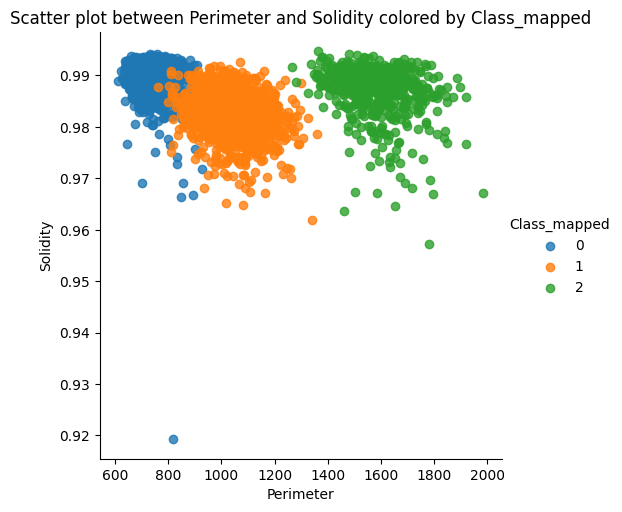

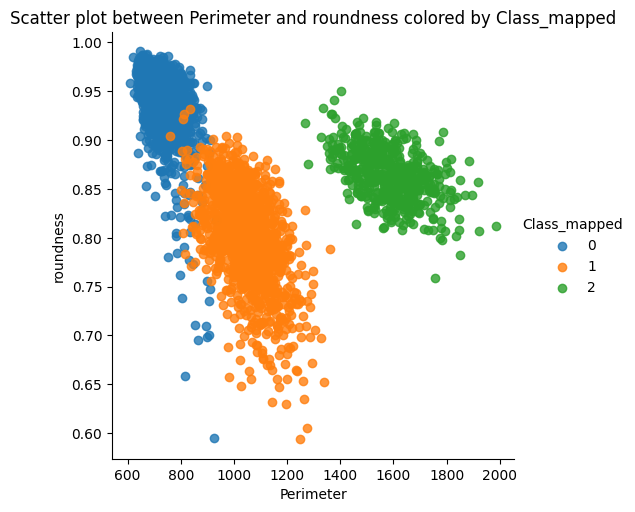

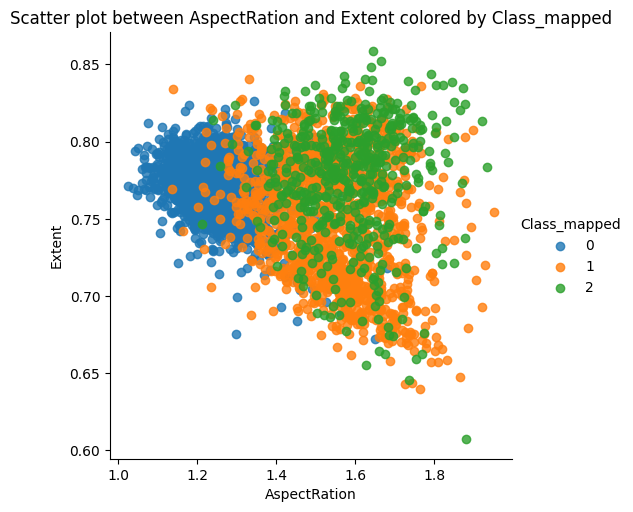

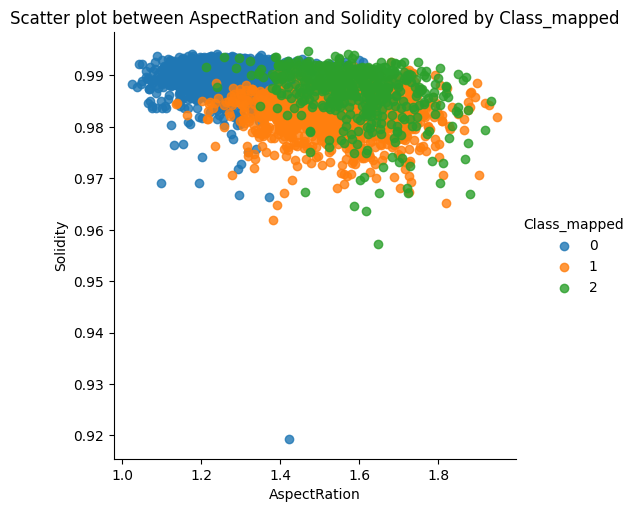

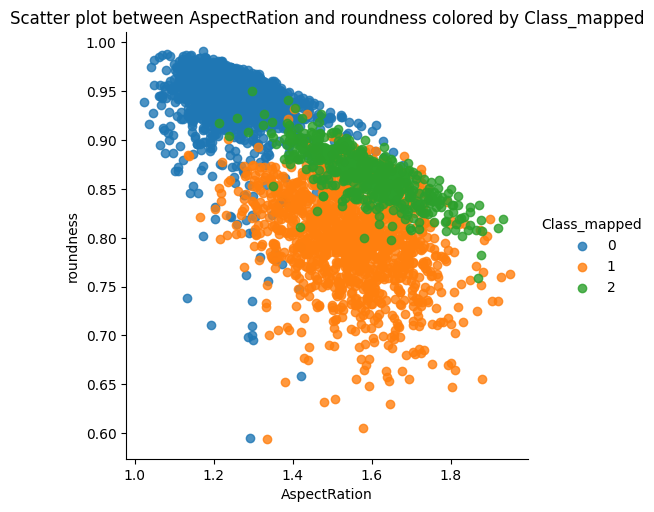

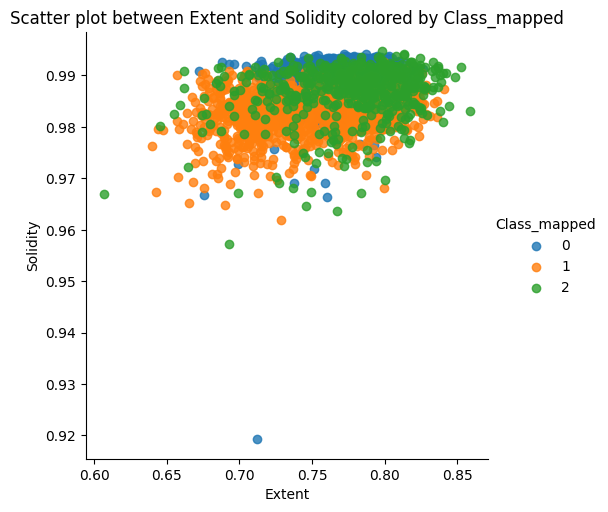

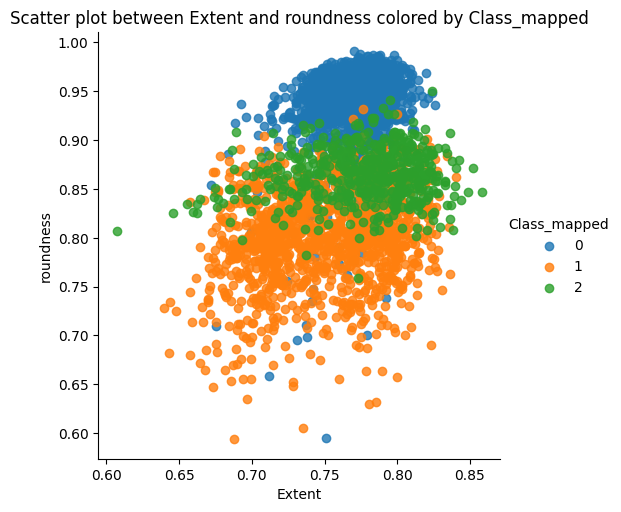

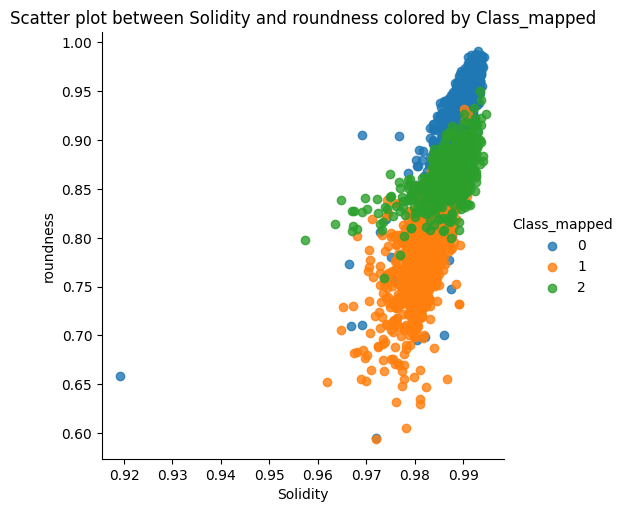

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
features = new_df.columns
class_column = 'Class_mapped'
for i in range(len(features)-1):
    for j in range(i + 1, len(features)-1):
        feature1 = features[i]
        feature2 = features[j]
        sns.lmplot(x=feature1, y=feature2, data=df, hue=class_column, fit_reg=False)
        plt.title(f'Scatter plot between {feature1} and {feature2} colored by {class_column}')
        plt.show()


In our analysis, we selected five key features: Perimeter, Aspect Ratio, Extent, Solidity, and Roundness. Pairwise plots of these features revealed challenges in effectively distinguishing data points. To address this, we propose employing Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) for dimensionality reduction. By capturing essential information and minimizing noise, PCA and SVD aim to enhance data interpretation. Focusing on computational efficiency, this reduction in dimensionality aligns with best practices in feature engineering. Visualizations will illustrate the impact of these techniques on feature distinctiveness, paving the way for more informed analyses and decision-making in our study.

## 3. Implement SVD and PCA logic on your own and find the appropriate k-dimensions to represent this data

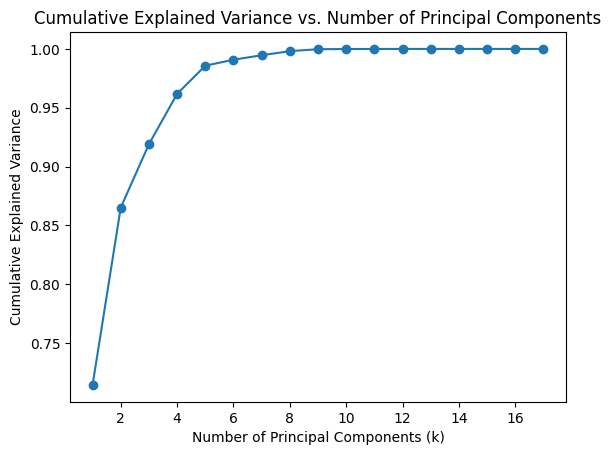

Number of dimensions (k) to retain 0.95% variance: 4

Projected Data:
        PC1       PC2       PC3       PC4
0 -4.243252  0.048878  0.396476 -0.092300
1 -4.797632 -0.582757  2.021158  0.576738
2 -4.074461 -0.069167  0.100978  0.270710
3 -3.638050  0.456378  2.895830  1.269132
4 -5.560961 -1.863206  1.534315 -0.416163


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def manual_pca(dataframe, threshold=0.95):

    numeric_df = dataframe.select_dtypes(include=[np.number])


    mean = numeric_df.mean()
    std = numeric_df.std()
    standardized_data = (numeric_df - mean) / std


    covariance_matrix = np.cov(standardized_data, rowvar=False)


    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)


    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]


    explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
    plt.xlabel('Number of Principal Components (k)')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Principal Components')
    plt.show()


    k = np.argmax(cumulative_explained_variance >= threshold) + 1
    print(f"Number of dimensions (k) to retain {threshold}% variance: {k}")


    selected_components = sorted_eigenvectors[:, :k]


    projected_data = np.dot(standardized_data, selected_components)


    columns = [f'PC{i+1}' for i in range(k)]
    projected_df = pd.DataFrame(data=projected_data, columns=columns)


    return projected_df, selected_components


projected_df_pca, selected_components = manual_pca(df_wo)
print("\nProjected Data:")
print(projected_df_pca.head())


PCA Logic:

Standardization:
Standardize the input dataframe by subtracting the mean and dividing by the standard deviation for each feature.
Covariance Matrix:
Multiply the matrix with its Transpose and divide it by length of the data -1 for the covariance of the matrix
Eigenvalue and Eigenvector Computation:
Use numpy's `eig` function to compute the eigenvalues and eigenvectors of the covariance matrix.

Sort Eigenvalues and Eigenvectors:
Sort the eigenvalues in ascending order and rearrange the corresponding eigenvectors accordingly.

Select Principal Components:
Choose the last `num_components` columns from the sorted eigenvectors matrix to form the principal components.

Transform Data:
Project the standardized data onto the selected principal components to obtain the reduced-dimensional representation.

Calculate Explained Variance:
  - Compute the explained variance ratio for each principal component.
  - Calculate the cumulative explained variance for better understanding.
  - Identify the explained variance associated with the selected number of components.

After conducting PCA, we observed significantly high explained variance ratios in the second and third principal components. Recognizing the interpretability and ease of visualization in 2D and 3D space, we judiciously selected dimensions \( K = 4 \), aligning with the optimal representation for our dataset.

SVD Logic:

SVD Function (svd):

1.Standardizes the input matrix X by subtracting the mean and dividing by the standard deviation along each column.
2.Calculates the covariance matrix of the standardized data.
3.Computes the eigenvalues and eigenvectors of the covariance matrix.
4.Sorts the eigenvalues and corresponding eigenvectors in descending order.
5.Calculates the singular value decomposition components: U, Sigma, and VT.
6.Returns the U matrix, singular values (Sigma), and the transposed VT matrix.

Custom SVD Function (custom_svd):

1.Extracts numerical features from the input DataFrame.
2.Calls the svd function to perform singular value decomposition on the numeric features.
3.Allows the user to specify the number of components to retain (num_components), defaulting to the minimum of the number of rows and columns in the input DataFrame.
4.Reconstructs the original matrix using the specified number of components.
Creates a new DataFrame with reduced features, labeled as 'Component_1', 'Component_2', etc.


In [ ]:
import numpy as np
import pandas as pd

def svd(X):
    # Standardize the matrix
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    cov_matrix = np.dot(X_standardized.T, X_standardized)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    sigma = np.sqrt(eigenvalues)
    U = X_standardized.dot(eigenvectors)[:, :len(sigma)]
    VT = eigenvectors.T
    return U, sigma, VT

def custom_svd(dataframe, num_components=None):
    features = dataframe.select_dtypes(include=[np.number])  # Select only numerical columns

    U, Sigma, VT = svd(features.values)

    if num_components is None:
        num_components = min(features.shape[0], features.shape[1])

    # Use matrix multiplication for reconstruction
    reduced_features = U[:, :num_components] @ np.diag(Sigma[:num_components]) @ VT[:num_components, :]

    reduced_dataframe = pd.DataFrame(reduced_features, columns=[f'Component_{i+1}' for i in range(16)])

    return reduced_dataframe

# Example usage:
df_svd = custom_svd(df_wo, num_components=3)


## 4. Visualize the data (t-sne plot) after applying SVD and PCA

Plotting PCA - 2D

In [ ]:
pca_2_df = merge_dataframes(projected_df_pca,class_mapped)

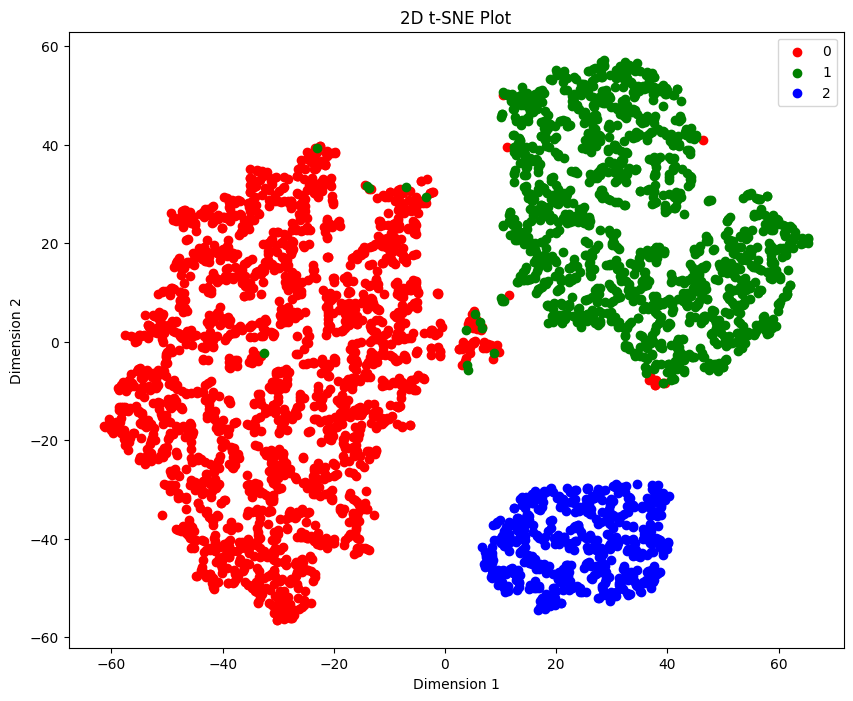

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = pca_2_df.drop('Class_mapped', axis=1)
y = pca_2_df['Class_mapped']


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Class_mapped'] = y


plt.figure(figsize=(10, 8))
classes = pca_2_df['Class_mapped'].unique()
colors = ['red', 'green', 'blue']

for i, class_label in enumerate(classes):
    class_data = tsne_df[tsne_df['Class_mapped'] == class_label]
    plt.scatter(class_data['Dimension 1'], class_data['Dimension 2'], c=colors[i], label=class_label)

plt.title('2D t-SNE Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


Plotting PCA - 3D

In [ ]:
pca_3_df = merge_dataframes(projected_df_pca,class_mapped)


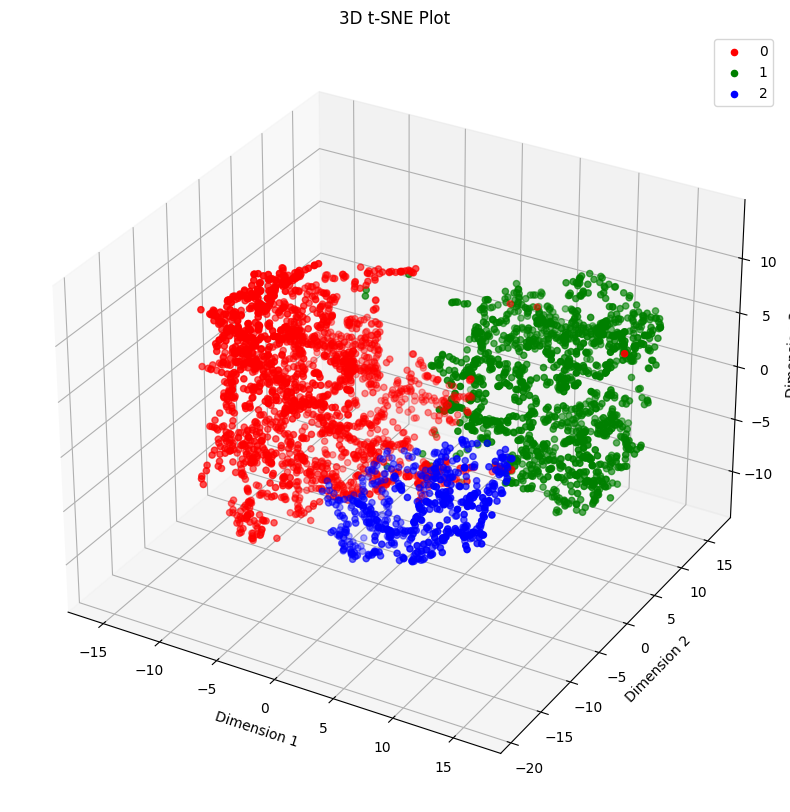

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = pca_3_df.drop('Class_mapped', axis=1)
y = pca_3_df['Class_mapped']

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

tsne_df_3d = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
tsne_df_3d['Class_mapped'] = y

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

classes = pca_2_df['Class_mapped'].unique()
colors = ['red', 'green', 'blue']

for i, class_label in enumerate(classes):
    class_data = tsne_df_3d[tsne_df_3d['Class_mapped'] == class_label]
    ax.scatter(class_data['Dimension 1'], class_data['Dimension 2'], class_data['Dimension 3'], c=colors[i], label=class_label)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.legend()
plt.title('3D t-SNE Plot')
plt.show()


Plotting SVD - 2 Components

In [ ]:

svd_2_df = merge_dataframes(df_svd,class_mapped)


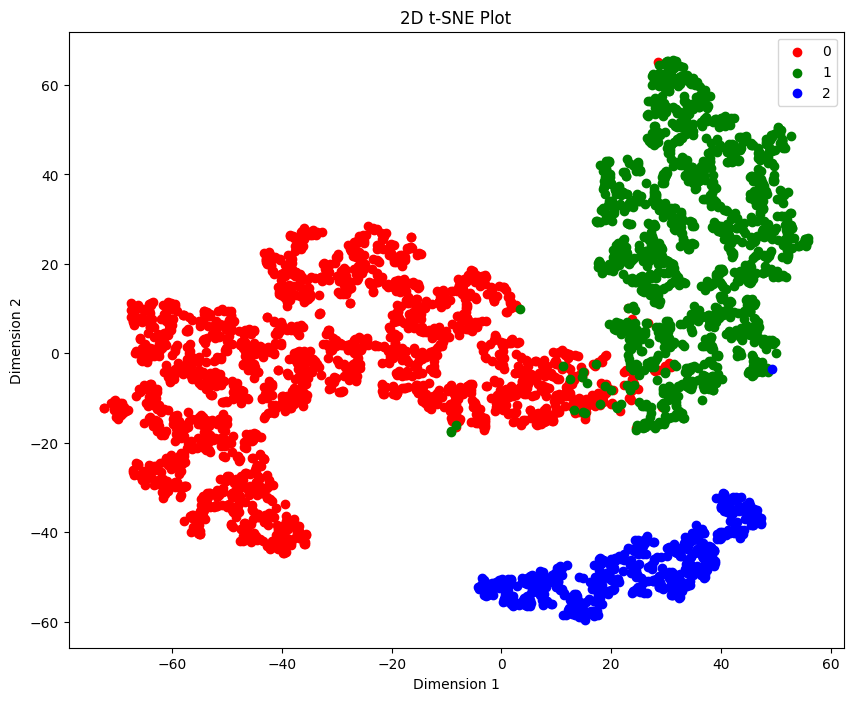

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = svd_2_df.drop('Class_mapped', axis=1)
y = svd_2_df['Class_mapped']


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Class_mapped'] = y


plt.figure(figsize=(10, 8))
classes = svd_2_df['Class_mapped'].unique()
colors = ['red', 'green', 'blue']

for i, class_label in enumerate(classes):
    class_data = tsne_df[tsne_df['Class_mapped'] == class_label]
    plt.scatter(class_data['Dimension 1'], class_data['Dimension 2'], c=colors[i], label=class_label)

plt.title('2D t-SNE Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


Plotting SVD - 3 Components

In [ ]:

svd_3_df = merge_dataframes(df_svd,class_mapped)


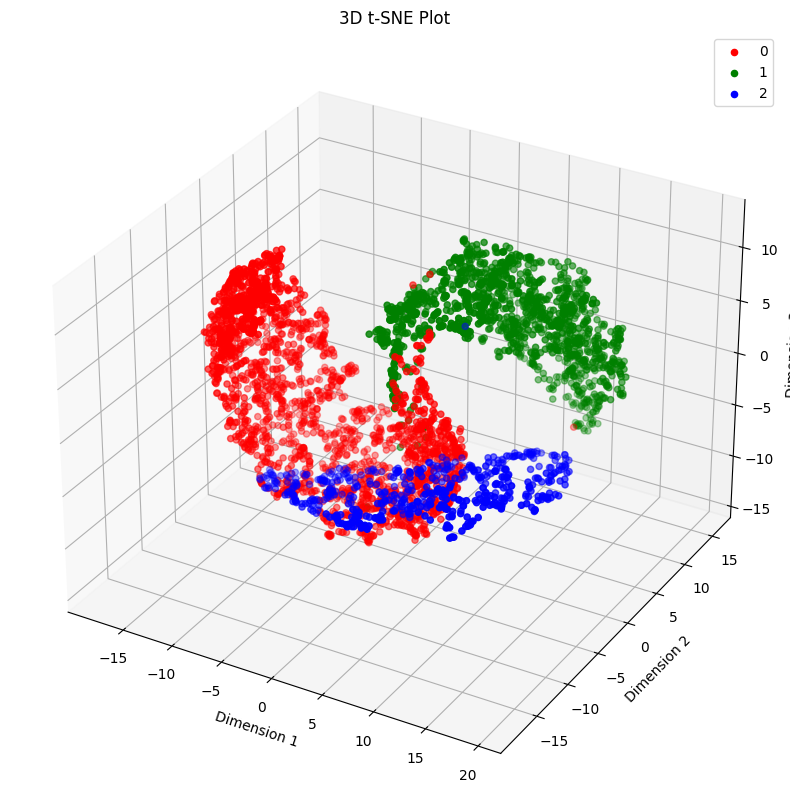

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = svd_3_df.drop('Class_mapped', axis=1)
y = svd_3_df['Class_mapped']

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

tsne_df_3d = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
tsne_df_3d['Class_mapped'] = y

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

classes = svd_2_df['Class_mapped'].unique()
colors = ['red', 'green', 'blue']

for i, class_label in enumerate(classes):
    class_data = tsne_df_3d[tsne_df_3d['Class_mapped'] == class_label]
    ax.scatter(class_data['Dimension 1'], class_data['Dimension 2'], class_data['Dimension 3'], c=colors[i], label=class_label)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.legend()
plt.title('3D t-SNE Plot')
plt.show()


# 5. State your conclusions as to how SVD and PCA have helped here.

Following Dimensionality Reduction through PCA and SVD, pairwise plots of our selected features exhibited enhanced data distinction, with SVD showcasing particularly notable results. This reduction not only improved visualization but also highlighted the effectiveness of SVD in emphasizing key patterns within the dataset.

PCA/SCD has successfully reduced the high-dimensional dataset to a
lower-dimensional space while retaining the most significant
information. Enabling a more manageable and interpret-able
representation of the data while maintaining key patterns and
relationships

